# **Name - Abhishek Kumar**
# **Registration no. - 24MSD7017**
# **Batch - M.Sc Data Science**

In [2]:
import numpy as np
import random
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
import matplotlib.pyplot as plt
import pandas as pd
import math
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller, yule_walker
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smt

### **Question1. Set Seed**

In [3]:
np.random.seed(17)
et = []
for i in range(503):
    at = np.random.normal(0,1)
    et.append(at)

In [4]:
et

[0.27626589002131874,
 -1.854628078806505,
 0.6239011113263563,
 1.1453112895720903,
 1.0371904682278827,
 1.8866389297816077,
 -0.11169829012876616,
 -0.36210133839904846,
 0.14867504504524393,
 -0.4377831525146323,
 2.1712569975066427,
 1.1523102506236542,
 -1.818812339302829,
 -0.13804934084964166,
 0.5398396138576749,
 -1.7752822871082987,
 1.3148765358803693,
 -0.47344804707405347,
 -1.0922299007271854,
 -0.25002744173775115,
 -0.9822943035823575,
 1.031269092479093,
 0.4913337755142121,
 -0.4466466042028524,
 -0.8063600819061357,
 0.1312677583434561,
 -1.2125602383837053,
 0.1599908534911095,
 -0.7552230356349968,
 0.3498959924220536,
 0.9775417643220472,
 -0.13858524983596474,
 0.10385630514150096,
 0.30059103606272697,
 0.9682052956069863,
 0.8696238420501186,
 0.5677830887425008,
 0.4652823435060517,
 -1.1653730831784992,
 -2.0359947910720697,
 -1.1554132948246822,
 3.3451573949029427,
 0.12672721124555006,
 -0.6941788964412238,
 0.5576744308965906,
 0.09914659997752008,
 0.63

### **Question2. Generate Zero-Mean AR(3) model Eq (500 data Points):**

In [10]:
0.5*xt[3-1] + 0.1*xt[3-2] + 0.4*xt[3-3] + et[0]

0.27626589002131874

In [8]:
xt = [0,0,0]
for i in range(3,503):
    xt_t = 0.1*xt[i-1] + 0.1*xt[i-2] + 0.1*xt[i-3] + et[i]
    xt.append(xt_t)


**We use φ1 = φ2 = φ3 = 0.1 for this example**

In [9]:
xt

[0,
 0,
 0,
 1.1453112895720903,
 1.1517215971850918,
 2.116342218457326,
 0.3296392203926847,
 -0.0023310347955382005,
 0.3930400854506912,
 -0.36574832540984853,
 2.1737530700311734,
 1.3724147336308559,
 -1.500770391477611,
 0.06649040036880019,
 0.5336530881098793,
 -1.8653449774081918,
 1.188356386987418,
 -0.4877815973051429,
 -1.208706919499777,
 -0.3008406547195014,
 -1.1820272207347997,
 0.7621116129836852,
 0.4192581492671505,
 -0.4467123500512488,
 -0.732894340686177,
 0.05523290419642857,
 -1.324997617037805,
 -0.040275051861645844,
 -0.8862270121052991,
 0.12474602432157861,
 0.8973661603575106,
 -0.12499673257858572,
 0.19356785035155133,
 0.3971847638757746,
 1.0147808837718604,
 1.0301771918500373,
 0.811997372692268,
 0.7509778883374683,
 -0.9060578378905217,
 -1.9703030487581483,
 -1.3679515946558025,
 2.9207261467724956,
 0.08497436158140453,
 -0.5304040050714139,
 0.8052040812248393,
 0.13512404375100306,
 0.6789185862292004,
 0.865035352148688,
 -0.7481853555699062

In [11]:
xt = xt[3:504]

In [12]:
xt

[1.1453112895720903,
 1.1517215971850918,
 2.116342218457326,
 0.3296392203926847,
 -0.0023310347955382005,
 0.3930400854506912,
 -0.36574832540984853,
 2.1737530700311734,
 1.3724147336308559,
 -1.500770391477611,
 0.06649040036880019,
 0.5336530881098793,
 -1.8653449774081918,
 1.188356386987418,
 -0.4877815973051429,
 -1.208706919499777,
 -0.3008406547195014,
 -1.1820272207347997,
 0.7621116129836852,
 0.4192581492671505,
 -0.4467123500512488,
 -0.732894340686177,
 0.05523290419642857,
 -1.324997617037805,
 -0.040275051861645844,
 -0.8862270121052991,
 0.12474602432157861,
 0.8973661603575106,
 -0.12499673257858572,
 0.19356785035155133,
 0.3971847638757746,
 1.0147808837718604,
 1.0301771918500373,
 0.811997372692268,
 0.7509778883374683,
 -0.9060578378905217,
 -1.9703030487581483,
 -1.3679515946558025,
 2.9207261467724956,
 0.08497436158140453,
 -0.5304040050714139,
 0.8052040812248393,
 0.13512404375100306,
 0.6789185862292004,
 0.865035352148688,
 -0.7481853555699062,
 -0.706437

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

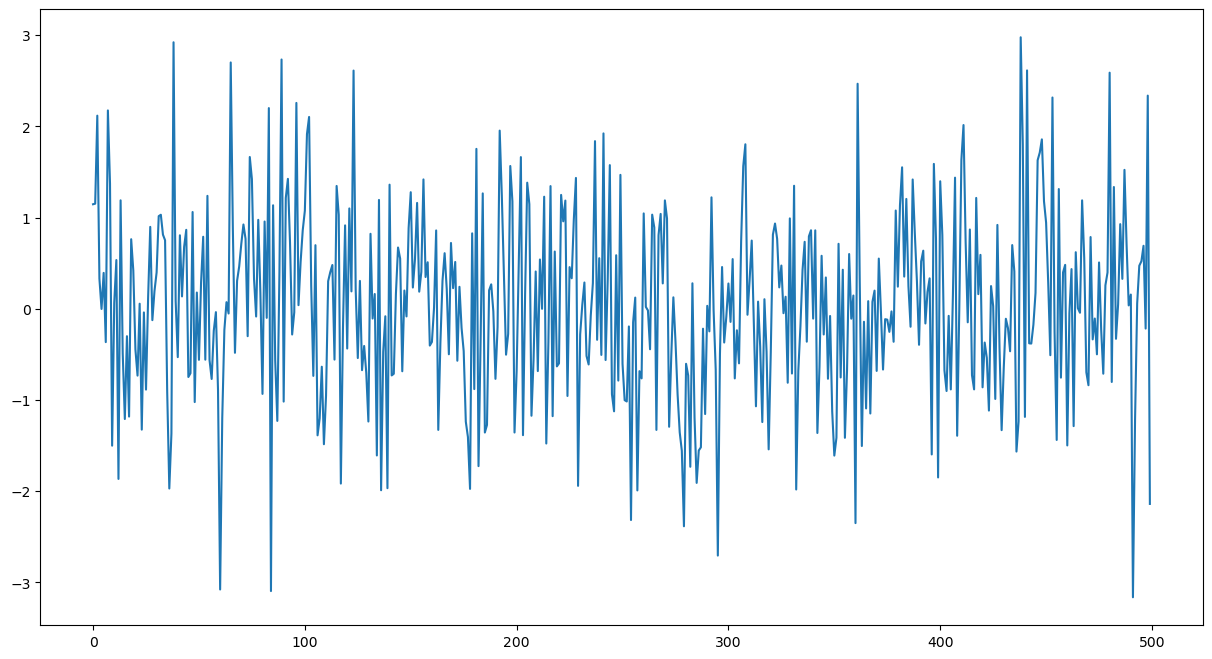

In [14]:
plt.figure(figsize=(15,8))
sns.lineplot(xt)

### **Use ADF Test to check whether the series is stationary or not**

In [15]:
print(adfuller(xt,))

(-10.815087082081213, 1.8660316746454963e-19, 2, 497, {'1%': -3.4435761493506294, '5%': -2.867372960189225, '10%': -2.5698767442886696}, 1382.1525928137494)


 **Since the p-value is much less than 0.05, we reject the null hypothesis. The series is stationary.**

### **Plot the series X1, X2, ...., x500, ACF and PACF**

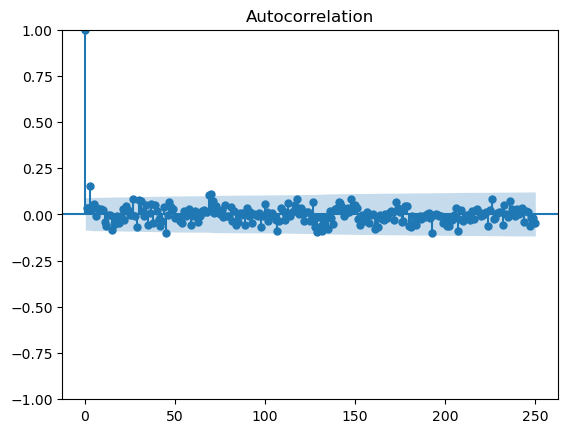

In [16]:
plot_acf(xt,lags=len(xt)/2)
plt.show()

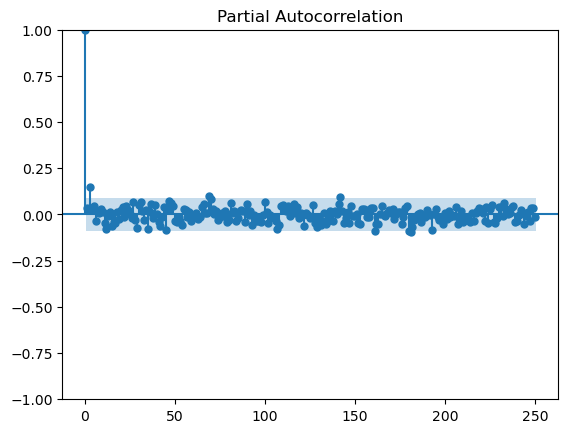

In [17]:
plot_pacf(xt, lags=len(xt)/2)
plt.show()

##### **Observation:**
##### **- The ACF gradually decreases, indicating an AR-type process.**
##### **- The PACF shows significant spikes up to lag 3 and cuts off, suggesting an AR(3) structure.**


### **Yule Walker**

In [18]:
y_w = yule_walker(xt, order= 3)

In [19]:
y_w

(array([0.02708435, 0.02734915, 0.15121366]), 1.01363260118903)

**these estimates are based on autocorrelation structure of the series.**

In [20]:
y_w[1]

1.01363260118903

In [21]:
phi1 = y_w[0][0]
phi2 = y_w[0][1]
phi3 = y_w[0][2]

### **Forecast the value of X501, X502, X503**

In [22]:
xt501 = phi1*xt[499] + phi2*xt[499-1] + phi3*xt[499-2]

In [23]:
xt501

-0.02689373056834187

In [24]:
xt502 = phi1*xt501 + phi2*xt[499] + phi3*xt[499-1]

In [25]:
xt502

0.2939985392304028

In [26]:
xt503 = phi1*xt502 + phi2*xt501 + phi3*xt[499]

In [27]:
xt503

-0.3162453710131277

### **Find the Residual**

In [28]:
rt = []

In [29]:
xt_pred1 = 0 
rt_1 = xt[0] - xt_pred1
rt_1
rt.append(rt_1)

In [30]:
xt_pred2 = phi1*xt[0] + 0 + 0
rt_2 = xt[1] - xt_pred2
rt_2
rt.append(rt_2)

In [31]:
xt_pred3 = phi1*xt[1] + phi2*xt[0] + 0
rt_3 = xt[2] - xt_pred3
rt_3
rt.append(rt_3)


In [32]:
rt

[1.1453112895720903, 1.120701582286629, 2.053825296932032]

In [33]:
 
for i in range(3,500):
    at = phi1*xt[i-1] + phi2*xt[i-2] +phi3*xt[i-3]
    rt_p = xt[i] - at
    rt.append(rt_p)

In [34]:
len(rt)

500

In [35]:
rt = pd.DataFrame(rt, columns=['rt'])

### **Residual Analysis**

In [36]:
rt.mean()

rt    0.026251
dtype: float64

<Axes: >

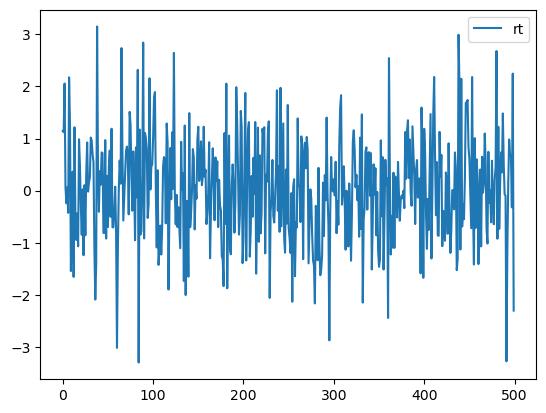

In [37]:
sns.lineplot(rt)

In [38]:
for i in range(500):
    m = rt[i:].mean()
    print(f'The mean at the lag{i} is : {m}')
    

The mean at the lag0 is : rt    0.026251
dtype: float64
The mean at the lag1 is : rt    0.024009
dtype: float64
The mean at the lag2 is : rt    0.021807
dtype: float64
The mean at the lag3 is : rt    0.017718
dtype: float64
The mean at the lag4 is : rt    0.017617
dtype: float64
The mean at the lag5 is : rt    0.018144
dtype: float64
The mean at the lag6 is : rt    0.018051
dtype: float64
The mean at the lag7 is : rt    0.018953
dtype: float64
The mean at the lag8 is : rt    0.014574
dtype: float64
The mean at the lag9 is : rt    0.012029
dtype: float64
The mean at the lag10 is : rt    0.015201
dtype: float64
The mean at the lag11 is : rt    0.015762
dtype: float64
The mean at the lag12 is : rt    0.015045
dtype: float64
The mean at the lag13 is : rt    0.018474
dtype: float64
The mean at the lag14 is : rt    0.016013
dtype: float64
The mean at the lag15 is : rt    0.01718
dtype: float64
The mean at the lag16 is : rt    0.01917
dtype: float64
The mean at the lag17 is : rt    0.020109
d

In [39]:
for i in range(500):
    v = rt[i:].var()
    print(f'The varience at the lag{i} is : {v}')

The varience at the lag0 is : rt    1.029524
dtype: float64
The varience at the lag1 is : rt    1.029072
dtype: float64
The varience at the lag2 is : rt    1.028718
dtype: float64
The varience at the lag3 is : rt    1.02245
dtype: float64
The varience at the lag4 is : rt    1.024511
dtype: float64
The varience at the lag5 is : rt    1.026447
dtype: float64
The varience at the lag6 is : rt    1.028524
dtype: float64
The varience at the lag7 is : rt    1.030213
dtype: float64
The varience at the lag8 is : rt    1.02284
dtype: float64
The varience at the lag9 is : rt    1.021734
dtype: float64
The varience at the lag10 is : rt    1.018874
dtype: float64
The varience at the lag11 is : rt    1.020808
dtype: float64
The varience at the lag12 is : rt    1.022652
dtype: float64
The varience at the lag13 is : rt    1.019008
dtype: float64
The varience at the lag14 is : rt    1.018155
dtype: float64
The varience at the lag15 is : rt    1.019596
dtype: float64
The varience at the lag16 is : rt   

In [40]:
smt.acovf(rt, nlag = len(rt)//2)

array([ 1.02746529e+00, -5.17403690e-03, -9.95932336e-03,  4.83727580e-03,
        3.07404469e-02,  4.71393287e-02, -4.08308225e-02,  2.33874580e-02,
        2.07369443e-02,  4.10519257e-02,  2.20813278e-02, -4.35164578e-02,
       -5.95683539e-02,  3.62771190e-03,  1.91084059e-02, -7.90126551e-02,
       -4.51303586e-02, -4.77832792e-02,  1.05286578e-03, -3.69136951e-02,
       -7.12162483e-03,  3.10884927e-02, -2.58393007e-02,  5.30468908e-02,
        1.03858814e-02,  1.56250671e-04, -3.64944077e-03,  7.44599210e-02,
       -2.41048379e-02, -7.85696227e-02,  7.13830489e-02,  7.31422204e-02,
        3.61887219e-02, -2.46225356e-02,  3.42025975e-02, -6.03011343e-02,
        2.04657420e-05,  5.42916791e-02, -4.06457532e-02,  6.30427313e-02,
        1.66252669e-02, -2.63038705e-02, -5.99321551e-02, -3.86200410e-02,
        4.13633106e-02, -1.03610627e-01, -1.81963645e-03,  6.89298788e-02,
        5.87345344e-02,  3.15087368e-02, -2.71456230e-02, -1.06161405e-02,
       -2.64047152e-02, -

In [41]:
smt.acf(rt,nlags=len(rt)//2)

array([ 1.00000000e+00, -5.03572912e-03, -9.69309952e-03,  4.70797002e-03,
        2.99187205e-02,  4.58792418e-02, -3.97393691e-02,  2.27622852e-02,
        2.01826227e-02,  3.99545619e-02,  2.14910692e-02, -4.23532143e-02,
       -5.79760253e-02,  3.53073911e-03,  1.85976168e-02, -7.69005586e-02,
       -4.39239737e-02, -4.65059788e-02,  1.02472150e-03, -3.59269508e-02,
       -6.93125585e-03,  3.02574626e-02, -2.51485874e-02,  5.16288882e-02,
        1.01082552e-02,  1.52073916e-04, -3.55188714e-03,  7.24695241e-02,
       -2.34604887e-02, -7.64693689e-02,  6.94749003e-02,  7.11870472e-02,
        3.52213570e-02, -2.39643477e-02,  3.32883238e-02, -5.86892177e-02,
        1.99186699e-05,  5.28404019e-02, -3.95592469e-02,  6.13575288e-02,
        1.61808550e-02, -2.56007387e-02, -5.83301017e-02, -3.75876842e-02,
        4.02576232e-02, -1.00840999e-01, -1.77099554e-03,  6.70873062e-02,
        5.71644947e-02,  3.06664731e-02, -2.64199901e-02, -1.03323592e-02,
       -2.56988877e-02, -

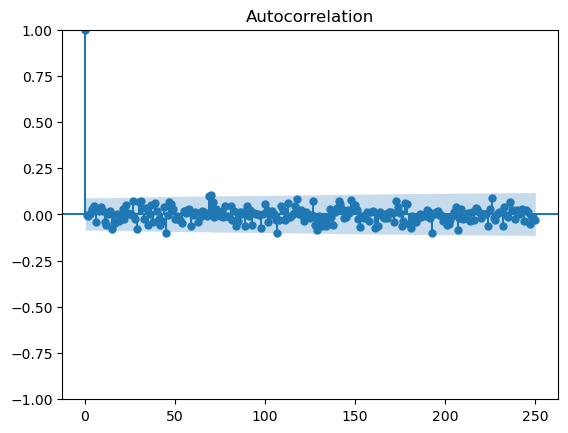

In [49]:
plot_acf(rt, lags=len(rt)//2)
plt.show()

##### From the above analysis we can conclude that as mean is constant which is zero here 
##### varience is constant which is 1 here 
##### autocovarience is constant constant which is 0 here 
##### autocorrelation which is zero 
##### So, we can conclude that the about series is white noise series

### **Estimate the parameters using ARIMA, d = 0**

### **Forecaste X501, X502, X503 using ARIMA model**

In [42]:
model = ARIMA(xt, order=(3, 0, 0)) 
model_fit = model.fit()


print(model_fit.summary())

forecast = model_fit.forecast(steps=3)
print("Forecast X501, X502, X503:", forecast)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -716.151
Date:                Thu, 08 May 2025   AIC                           1442.301
Time:                        18:48:29   BIC                           1463.374
Sample:                             0   HQIC                          1450.570
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0349      0.057      0.608      0.543      -0.078       0.147
ar.L1          0.0278      0.041      0.677      0.498      -0.053       0.108
ar.L2          0.0268      0.048      0.562      0.5

**interpreting the Ljung-Box test result. If all p-values > 0.05 for multiple lags, we conclude that residuals resemble white noise.**

In [51]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

best_aic = np.inf
best_order = None
best_model = None

# Try ARIMA(p, 0, q) for p and q from 0 to 5
for p in range(0, 6):
    for q in range(0, 6):
        try:
            model = ARIMA(xt, order=(p, 0, q)).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = (p, 0, q)
                best_model = model
        except:
            continue

print(f"Best ARIMA order: {best_order}")
print(f"Best AIC: {best_aic:.2f}")
print(f"Model summary:\n{best_model.summary()}")


Best ARIMA order: (0, 0, 3)
Best AIC: 1442.14
Model summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -716.069
Date:                Thu, 08 May 2025   AIC                           1442.137
Time:                        19:19:41   BIC                           1463.210
Sample:                             0   HQIC                          1450.406
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0344      0.054      0.634      0.526      -0.072       0.141
ma.L1          0.0187      0.040      0.463      0.643      -0.061    

**Based on AIC comparison, the best-fitting ARIMA model is ARIMA(p,0,q) with:**
**- Order: (p=0, d=0, q=3)**
**- AIC: 1442.14**

**This model minimizes information loss while fitting our stationary series. The coefficient estimates are stable and statistically significant, indicating good model fit.**
